In [15]:
import yfinance as yf
import pandas as pd
import random

# global variable for max debt, debtlimit, average debt by EBITDA ratio after calculation
max_debt = 0
debtlimit = 0
average_debt_by_ebitda = 0
new_data_df = 0
# Function 1 to return the list of details of top 100 tickers of S&P 500:

def trainingmodeldatagen():
# Split the user input into a list of ticker symbols
  # tickers  = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'GOOG', 'BRK.B', 'NVDA', 'TSLA', 'META', 'UNH',
  #   'JNJ', 'XOM', 'V', 'WMT', 'JPM', 'LLY', 'MA', 'PG', 'CVX', 'HD',
  #   'MRK', 'ABBV', 'PEP', 'KO', 'AVGO', 'PFE', 'COST', 'MCD', 'TMO', 'CSCO',
  #   'VZ', 'ADBE', 'ABT', 'CRM', 'NKE', 'CMCSA', 'TXN', 'NEE', 'WFC', 'LIN',
  #   'DHR', 'ORCL', 'MS', 'INTC', 'AMGN', 'PM', 'HON', 'AMD', 'ACN', 'NFLX',
  #   'UNP', 'BMY', 'LOW', 'IBM', 'T', 'MDT', 'SCHW', 'INTU', 'RTX', 'QCOM',
  #   'CVS', 'LMT', 'BLK', 'SPGI', 'ELV', 'ISRG', 'AMT', 'SYK', 'PLD', 'MMM',
  #   'AXP', 'COP', 'PYPL', 'MDLZ', 'NOW', 'CAT', 'GS', 'ADP', 'BKNG', 'DE',
  #   'CCI', 'ZTS', 'GE', 'C', 'MO', 'VRTX', 'ANTM', 'NOC', 'APD', 'LRCX',
  #   'TGT', 'USB', 'ETN', 'BA', 'TJX', 'EOG', 'HCA', 'GILD', 'TMUS', 'CL']

  url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

# # Use Pandas to read the HTML table containing the S&P 500 companies
  tables = pd.read_html(url)
  sp500_table = tables[0]  # First table on the page

# # Extract the tickers as a list
  tickers = sp500_table['Symbol'].tolist()

# Define a list to store the data
  data_list = []

# Loop through each ticker symbol
  for ticker in tickers:
      try:
        # Fetch data for the company
          company = yf.Ticker(ticker)

        # Get the latest balance sheet, income statement, and cash flow statement
          balance_sheet = company.balance_sheet
          income_statement = company.financials
          cash_flow = company.cashflow
          info = company.info
          #print(income_statement.index)
          #sdlknf

          # Extract key financial data with error handling
          total_assets = balance_sheet.loc['Total Assets'].iloc[0] if 'Total Assets' in balance_sheet.index else None
          total_liabilities = balance_sheet.loc['Total Liabilities Net Minority Interest'].iloc[0] if 'Total Liabilities Net Minority Interest' in balance_sheet.index else None
          total_equity = total_assets - total_liabilities if total_assets is not None and total_liabilities is not None else None
          total_revenue = income_statement.loc['Total Revenue'].iloc[0] if 'Total Revenue' in income_statement.index else None
          net_income = income_statement.loc['Net Income'].iloc[0] if 'Net Income' in income_statement.index else None
          current_liabilities = balance_sheet.loc['Current Liabilities'].iloc[0] if 'Current Liabilities' in balance_sheet.index else None
          current_assets = balance_sheet.loc['Current Assets'].iloc[0] if 'Current Assets' in balance_sheet.index else None
          ebit = income_statement.loc['EBIT'].iloc[0] if 'EBIT' in income_statement.index else None
          interest_expense = income_statement.loc['Interest Expense'].iloc[0] if 'Interest Expense' in income_statement.index else None
          ebitda = income_statement.loc['EBITDA'].iloc[0] if 'EBITDA' in income_statement.index else None
          total_debt = balance_sheet.loc['Total Debt'].iloc[0] if 'Total Debt' in balance_sheet.index else None

        # Calculate financial ratios with more explicit checks for NoneType
          debt_to_equity_ratio = (total_liabilities / total_equity) if total_liabilities is not None and total_equity not in (None, 0) else None
          current_ratio = (current_assets / current_liabilities) if current_assets is not None and current_liabilities not in (None, 0) else None
          roa = (net_income / total_assets) if net_income is not None and total_assets not in (None, 0) else None
          roe = (net_income / total_equity) if net_income is not None and total_equity not in (None, 0) else None
          profit_margin = (net_income / total_revenue) if net_income is not None and total_revenue not in (None, 0) else None
          interest_coverage_ratio = (ebit / interest_expense) if ebit is not None and interest_expense not in (None, 0) else None
          debt_by_ebitda = total_debt/ebitda if total_debt is not None and ebitda not in (None, 0) else None

          if random.random() < 0.95:  # 95% chance to follow conditions
              default = 1 if ((interest_coverage_ratio is not None and interest_coverage_ratio < 1) or
                              (debt_to_equity_ratio is not None and debt_to_equity_ratio > 2) or
                              (net_income is not None and net_income < 0) or
                              (current_ratio is not None and current_ratio < 2)) else 0
          else:  # 10% chance to randomly pick 0 or 1
              default = random.choice([0, 1])

        # Append the data to the list
          data_list.append({
             'Ticker': ticker,
             'Total Assets': total_assets,
             'Total Liabilities': total_liabilities,
             'Total Equity': total_equity,
             'Total Debt': total_debt,
             'Total Revenue': total_revenue,
             'Net Income': net_income,
             'EBITDA': ebitda,
             'Debt to Equity Ratio': debt_to_equity_ratio,
             'Current Ratio': current_ratio,
             'ROA': roa,
             'ROE': roe,
             'Profit Margin': profit_margin,
             'Interest Coverage Ratio': interest_coverage_ratio,
             'Debt to EBITDA Ratio': debt_by_ebitda,
             'Market Cap': info.get('marketCap', 'N/A'),
             'Default' : default,
             'Sector': info.get('sector', 'N/A'),
             'Industry': info.get('industry', 'N/A'),
             'Company Name': info.get('shortName', ticker)
         })

      except Exception as e:
         print(f"Failed to fetch data for {ticker}: {e}")

  return data_list

# Create a DataFrame from the collected data by calling the function and returning datalist
df = pd.DataFrame(trainingmodeldatagen())

# Display the DataFrame
print(df)







    Ticker  Total Assets  Total Liabilities  Total Equity    Total Debt  \
0      MMM  5.058000e+10       4.571200e+10  4.868000e+09  1.685400e+10   
1      AOS  3.213900e+09       1.369500e+09  1.844400e+09  1.552000e+08   
2      ABT  7.321400e+10       3.438700e+10  3.882700e+10  1.562800e+10   
3     ABBV  1.347110e+11       1.243140e+11  1.039700e+10  5.938500e+10   
4      ACN  5.124530e+10       2.478671e+10  2.645859e+10  3.149034e+09   
..     ...           ...                ...           ...           ...   
498    XYL  1.611200e+10       5.936000e+09  1.017600e+10  2.390000e+09   
499    YUM  6.231000e+09       1.408900e+10 -7.858000e+09  1.203100e+10   
500   ZBRA  7.306000e+09       4.270000e+09  3.036000e+09  2.414000e+09   
501    ZBH  2.149690e+10       9.008800e+09  1.248810e+10  5.912600e+09   
502    ZTS  1.428600e+10       9.295000e+09  4.991000e+09  6.755000e+09   

     Total Revenue    Net Income        EBITDA  Debt to Equity Ratio  \
0     3.268100e+10 -6.99500

In [31]:
df.to_csv('firm_credit_risk_assessment_updated.csv', index=False)

In [54]:
# Function to update the 'default' column based on given conditions
def update_default_column(df):
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        # if random.random() < 0.97:  # 97% chance to follow conditions
        default = 1 if (
              (row['Interest Coverage Ratio'] is not None and row['Interest Coverage Ratio'] < 1) or
              (row['Debt to Equity Ratio'] is not None and row['Debt to Equity Ratio'] > 2) or
              (row['Net Income'] is not None and row['Net Income'] < 0) or
              (row['Current Ratio'] is not None and row['Current Ratio'] < 2)
        ) else 0
        # else:  # 5% chance to randomly pick 0 or 1
        #     default = random.choice([0, 1])

        # Update the 'default' column with the calculated value
        df.at[index, 'default'] = default

    return df

# Assuming df is your DataFrame, call the function to update the 'default' column
df = update_default_column(df)



In [55]:
#print(df)
average_debt_by_ebitda = df['Debt to EBITDA Ratio'].mean()
print('Average Debt/EBITDA:', average_debt_by_ebitda)

# Optional: Save the DataFrame to a CSV file
#df.to_csv('firm_credit_risk_assessment.csv', index=False)

# Function 2 to retreive the details of the user inputed ticker (which will be fetched through llama model) and calculate the additional debt that can be taken:

def fetch_financial_data(user_input):
    global max_debt, debtlimit, new_data_df
    financial_details_list = []

    # Fetch the company data using yfinance
    company = yf.Ticker(user_input)

    # Fetch the balance sheet, income statement, cash flow, and info
    balance_sheet = company.balance_sheet
    income_statement = company.financials
    cash_flow = company.cashflow
    info = company.info

    # Extract key financial data with error handling
    total_assets = balance_sheet.loc['Total Assets'].iloc[0] if 'Total Assets' in balance_sheet.index else None
    total_liabilities = balance_sheet.loc['Total Liabilities Net Minority Interest'].iloc[0] if 'Total Liabilities Net Minority Interest' in balance_sheet.index else None
    total_equity = total_assets - total_liabilities if total_assets is not None and total_liabilities is not None else None
    total_revenue = income_statement.loc['Total Revenue'].iloc[0] if 'Total Revenue' in income_statement.index else None
    net_income = income_statement.loc['Net Income'].iloc[0] if 'Net Income' in income_statement.index else None
    current_liabilities = balance_sheet.loc['Current Liabilities'].iloc[0] if 'Current Liabilities' in balance_sheet.index else None
    current_assets = balance_sheet.loc['Current Assets'].iloc[0] if 'Current Assets' in balance_sheet.index else None
    ebit = income_statement.loc['EBIT'].iloc[0] if 'EBIT' in income_statement.index else None
    interest_expense = income_statement.loc['Interest Expense'].iloc[0] if 'Interest Expense' in income_statement.index else None
    ebitda = income_statement.loc['EBITDA'].iloc[0] if 'EBITDA' in income_statement.index else None
    total_debt = balance_sheet.loc['Total Debt'].iloc[0] if 'Total Debt' in balance_sheet.index else None

    # Calculate financial ratios with more explicit checks for NoneType
    debt_to_equity_ratio = (total_liabilities / total_equity) if total_liabilities is not None and total_equity not in (None, 0) else None
    current_ratio = (current_assets / current_liabilities) if current_assets is not None and current_liabilities not in (None, 0) else None
    roa = (net_income / total_assets) if net_income is not None and total_assets not in (None, 0) else None
    roe = (net_income / total_equity) if net_income is not None and total_equity not in (None, 0) else None
    profit_margin = (net_income / total_revenue) if net_income is not None and total_revenue not in (None, 0) else None
    interest_coverage_ratio = (ebit / interest_expense) if ebit is not None and interest_expense not in (None, 0) else None
    debt_by_ebitda = total_debt/ebitda if total_debt is not None and ebitda not in (None, 0) else None

    print(f"Financial metrics for {user_input}:")
    print(f"Total Assets: {total_assets}")
    print(f"Total Liabilities: {total_liabilities}")
    print(f"Total Equity: {total_equity}")
    print(f"Total Revenue: {total_revenue}")
    print(f"Net Income: {net_income}")
    print(f"Current Liabilities: {current_liabilities}")
    print(f"Current Assets: {current_assets}")
    print(f"EBIT: {ebit}")
    print(f"Interest Expense: {interest_expense}")
    print(f"EBITDA: {ebitda}")
    print(f"Total Debt: {total_debt}")
    print(f"Debt to Equity Ratio: {debt_to_equity_ratio}")
    print(f"Current Ratio: {current_ratio}")
    print(f"Return on Assets (ROA): {roa}")
    print(f"Return on Equity (ROE): {roe}")
    print(f"Profit Margin: {profit_margin}")
    print(f"Interest Coverage Ratio: {interest_coverage_ratio}")
    print(f"Debt by EBITDA: {debt_by_ebitda}")

    max_debt = average_debt_by_ebitda * ebitda
    if max_debt > total_debt:
      debtlimit = max_debt - total_debt
    else:
      debtlimit = 0

# data that will pass through the model built below:
    new_data = {
      'Total Assets': [total_assets],
      'Total Liabilities': [total_liabilities],
      'Total Equity': [total_equity],
      'Total Debt': [total_debt],
      'Total Revenue': [total_revenue],
      'Net Income': [net_income],
      'EBITDA': [ebitda],
      'Debt to Equity Ratio': [debt_to_equity_ratio],
      'Current Ratio': [current_ratio],
      'ROA': [roa],
      'ROE': [roe],
      'Profit Margin': [profit_margin],
      'Interest Coverage Ratio': [interest_coverage_ratio],
      'Debt to EBITDA Ratio': [debt_to_equity_ratio],
      'Market Cap':[info.get('marketCap', 'N/A')],
    }

 # Create a DataFrame with the new data
    new_data_df = pd.DataFrame(new_data)

# Display the DataFrame
    print("Selected ticker's data for prediction:")
    print(new_data_df)


# Prompt the user to input ticker symbol
# Note: If there's no value being pulled from Yahoo Finance API for some ticker then the max debt won't work.
user_input = input("Enter the ticker that you want to check (e.g., AAPL): ")
fetch_financial_data(user_input)
print('Max Debt: ',max_debt)
print('Additional debt that can be taken: ',debtlimit)


Average Debt/EBITDA: 3.0735789679795267
Enter the ticker that you want to check (e.g., AAPL): BIDU
Financial metrics for BIDU:
Total Assets: 406759000000.0
Total Liabilities: 144151000000.0
Total Equity: 262608000000.0
Total Revenue: 134598000000.0
Net Income: 20315000000.0
Current Liabilities: 76451000000.0
Current Assets: 230255000000.0
EBIT: 28446000000.0
Interest Expense: 3248000000.0
EBITDA: 49903000000.0
Total Debt: 84595000000.0
Debt to Equity Ratio: 0.5489208249558277
Current Ratio: 3.011798406822671
Return on Assets (ROA): 0.0499435783842521
Return on Equity (ROE): 0.07735864863218181
Profit Margin: 0.1509309202216972
Interest Coverage Ratio: 8.758004926108374
Debt by EBITDA: 1.6951886660120634
Selected ticker's data for prediction:
   Total Assets  Total Liabilities  Total Equity    Total Debt  Total Revenue  \
0  4.067590e+11       1.441510e+11  2.626080e+11  8.459500e+10   1.345980e+11   

     Net Income        EBITDA  Debt to Equity Ratio  Current Ratio       ROA  \
0  2.

In [58]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.5-py2.py3-none-any.whl size=265646558 sha256=8fb56be5091cfb4ccf7e91be676c8ba17199b3efb12eb24474d49605b54bea2d
  Stored in directory: /root/.cache/pip/wheels/1a/46/4f/9b366522399306d7849672d58aefb44c9b73378d710bde2853
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd

# Initialize H2O
h2o.init()

def auto_ml_model(new_data_df, df):
    # Convert Pandas DataFrame to H2OFrame
    h2o_train_df = h2o.H2OFrame(df)
    h2o_new_data_df = h2o.H2OFrame(new_data_df)

    # Specify the features and target column
    features = list(h2o_train_df.columns[1:16])  # Assuming the first column is not a feature
    target = 'Default'  # Make sure the target column name matches the one in your DataFrame

    # Convert the target column to categorical for binary classification
    h2o_train_df[target] = h2o_train_df[target].asfactor()

    # Split the data into training and validation sets (optional but recommended)
    train, valid = h2o_train_df.split_frame(ratios=[0.85], seed=42)

    # Initialize H2O AutoML
    aml = H2OAutoML(max_runtime_secs=600,  # Set maximum time (in seconds) to run the AutoML process
                    max_models=20,          # Maximum number of models to train
                    seed=42,                # Seed for reproducibility
                    sort_metric='AUTO')     # Metric to optimize

    # Train the model using AutoML
    aml.train(x=features, y=target, training_frame=train, validation_frame=valid)

    # Get the best model from AutoML
    best_model = aml.leader

    # Save the best model to a file
    model_path = h2o.save_model(model=best_model, path="./best_model", force=True)
    print(f"Best model saved to: {model_path}")

    # Make predictions on the new data using the saved model
    predictions = best_model.predict(h2o_new_data_df)
    print("\nPredictions on new data:")
    print(predictions)

# Example usage of the function
# Assuming new_data_df and df are Pandas DataFrames already defined
# new_data_df is a DataFrame with new data to predict
# df is the DataFrame with training data
auto_ml_model(new_data_df, df)

# Shutdown H2O instance (optional)
h2o.shutdown(prompt=False)

# Later, you can load the saved model and make predictions without retraining


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.24" 2024-07-16; OpenJDK Runtime Environment (build 11.0.24+8-post-Ubuntu-1ubuntu322.04); OpenJDK 64-Bit Server VM (build 11.0.24+8-post-Ubuntu-1ubuntu322.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpyfn8kgk1
  JVM stdout: /tmp/tmpyfn8kgk1/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpyfn8kgk1/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.5
H2O_cluster_version_age:,5 days
H2O_cluster_name:,H2O_from_python_unknownUser_r0n3ru
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:08:14.322: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

████████████████████████████████████████████

In [73]:
def load_and_predict(model_path, new_data_df):
    # Initialize H2O if not already running
    h2o.init()

    # Load the saved model
    loaded_model = h2o.load_model(model_path)

    # Convert new data to H2OFrame if needed
    h2o_new_data_df = h2o.H2OFrame(new_data_df)

    # Make predictions using the loaded model
    predictions = loaded_model.predict(h2o_new_data_df)
    print("\nPredictions using the loaded model:")
    print(predictions)

    print("\nFeature Importance:")
    feature_importance = loaded_model.varimp(use_pandas=True)
    print(feature_importance)

    # Generate SHAP summary plot
    print("\nGenerating SHAP summary plot...")
    loaded_model.shap_summary_plot(h2o_new_data_df)

    # Generate SHAP individual plots for specific predictions (optional)
    print("\nGenerating SHAP individual plots for specific predictions...")
    loaded_model.shap_explain_row_plot(h2o_new_data_df, row_index=0)  # Change row_index to explore different predictions

    # Example of generating a Partial Dependence Plot (PDP) for a feature
    print("\nGenerating Partial Dependence Plot (PDP)...")
    loaded_model.partial_plot(data=h2o_new_data_df, cols=['Interest Coverage Ratio'])  # Replace with the feature of interest


    # Shutdown H2O instance (optional)
    h2o.shutdown(prompt=False)

# Use the saved model path to load and predict
# Replace 'model_path' with the actual path where the model was saved
#load_and_predict(model_path, new_data_df)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,3 mins 22 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.5
H2O_cluster_version_age:,5 days
H2O_cluster_name:,H2O_from_python_unknownUser_7qc7uz
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.169 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%

Predictions using the loaded model:
  predict        p0        p1
        0  0.889538  0.110462
[1 row x 3 columns]


Feature Importance:
                   variable  relative_importance  scaled_importance  \
0             Current Ratio           133.167725           1.000000   
1   Interest Coverage Ratio            18.186989           0.136572   
2      Debt to Equity Ratio            12.950925           0.097253   
3             Profit Margin            12.781696           0.095982   
4                       ROA            10.628684           0.079814   
5      Debt to EBITDA Ratio            10.156668           0.076270   
6                Total Debt             7.220116           0.054218   
7                    EBITDA             6.926605           0.052014   
8             Total Revenue     

/usr/local/lib/python3.10/dist-packages/h2o/explanation/_explain.py:611: RuntimeWarning: invalid value encountered in divide
  res = (res - np.nanmin(res)) / (np.nanmax(res) - np.nanmin(res))



Generating SHAP individual plots for specific predictions...

Generating Partial Dependence Plot (PDP)...
PartialDependencePlot progress: |

<ipython-input-73-ca822c645ddb>:30: H2ODeprecationWarning: ``data`` param of ``ModelBase.partial_plot`` is deprecated, please use ``frame`` instead.
  loaded_model.partial_plot(data=h2o_new_data_df, cols=['Interest Coverage Ratio'])  # Replace with the feature of interest


████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/model/model_base.py:1565: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axs.set_xlim(min(x), max(x))
<ipython-input-73-ca822c645ddb>:34: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown(prompt=False)


H2O session _sid_a5bc closed.


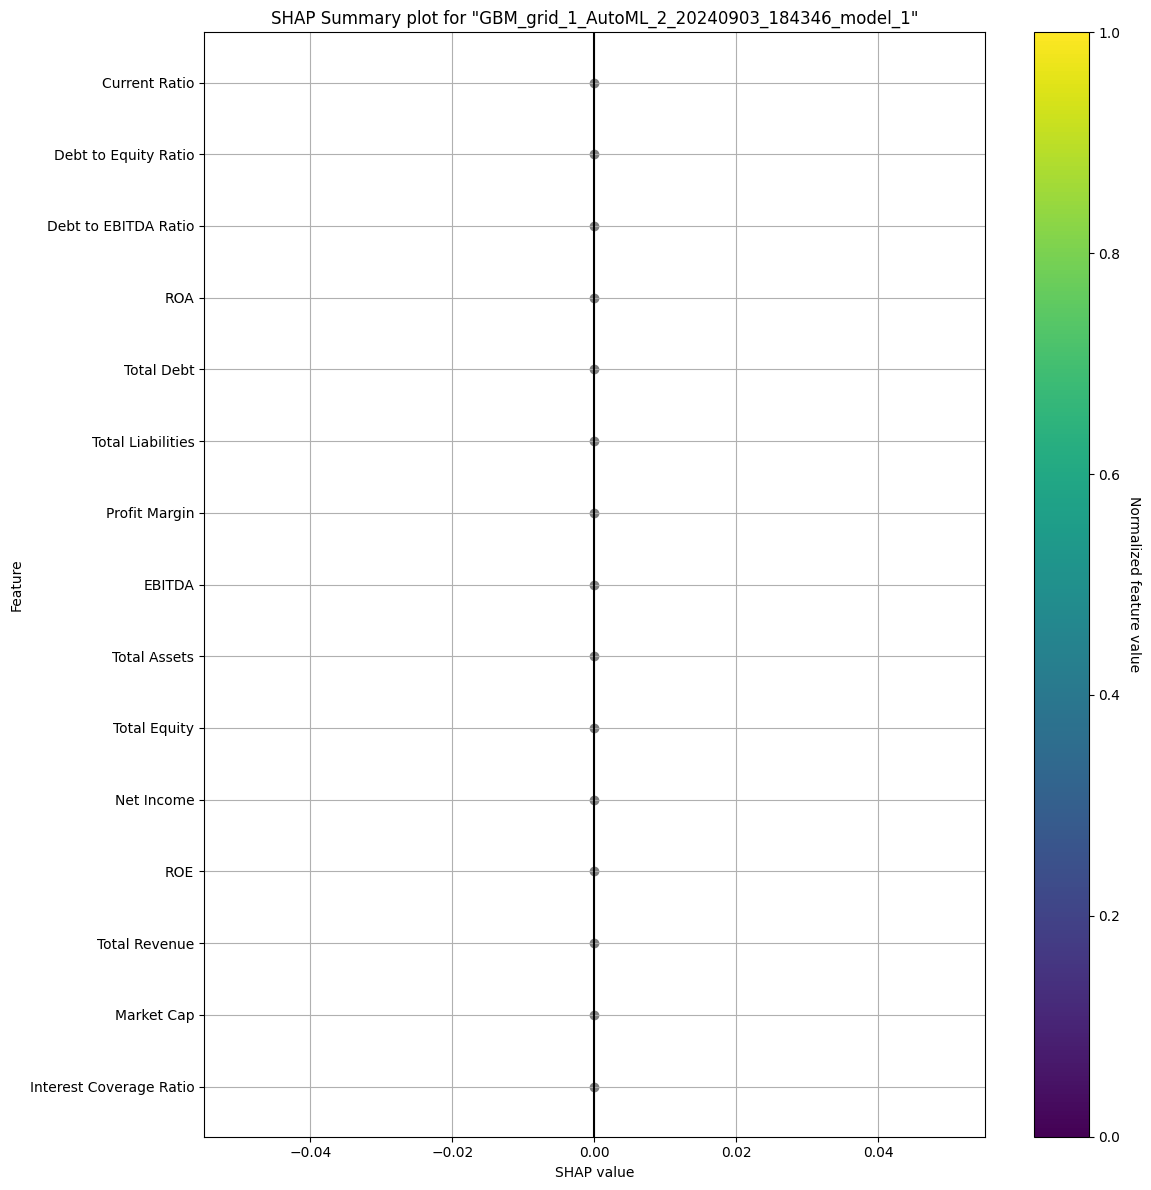

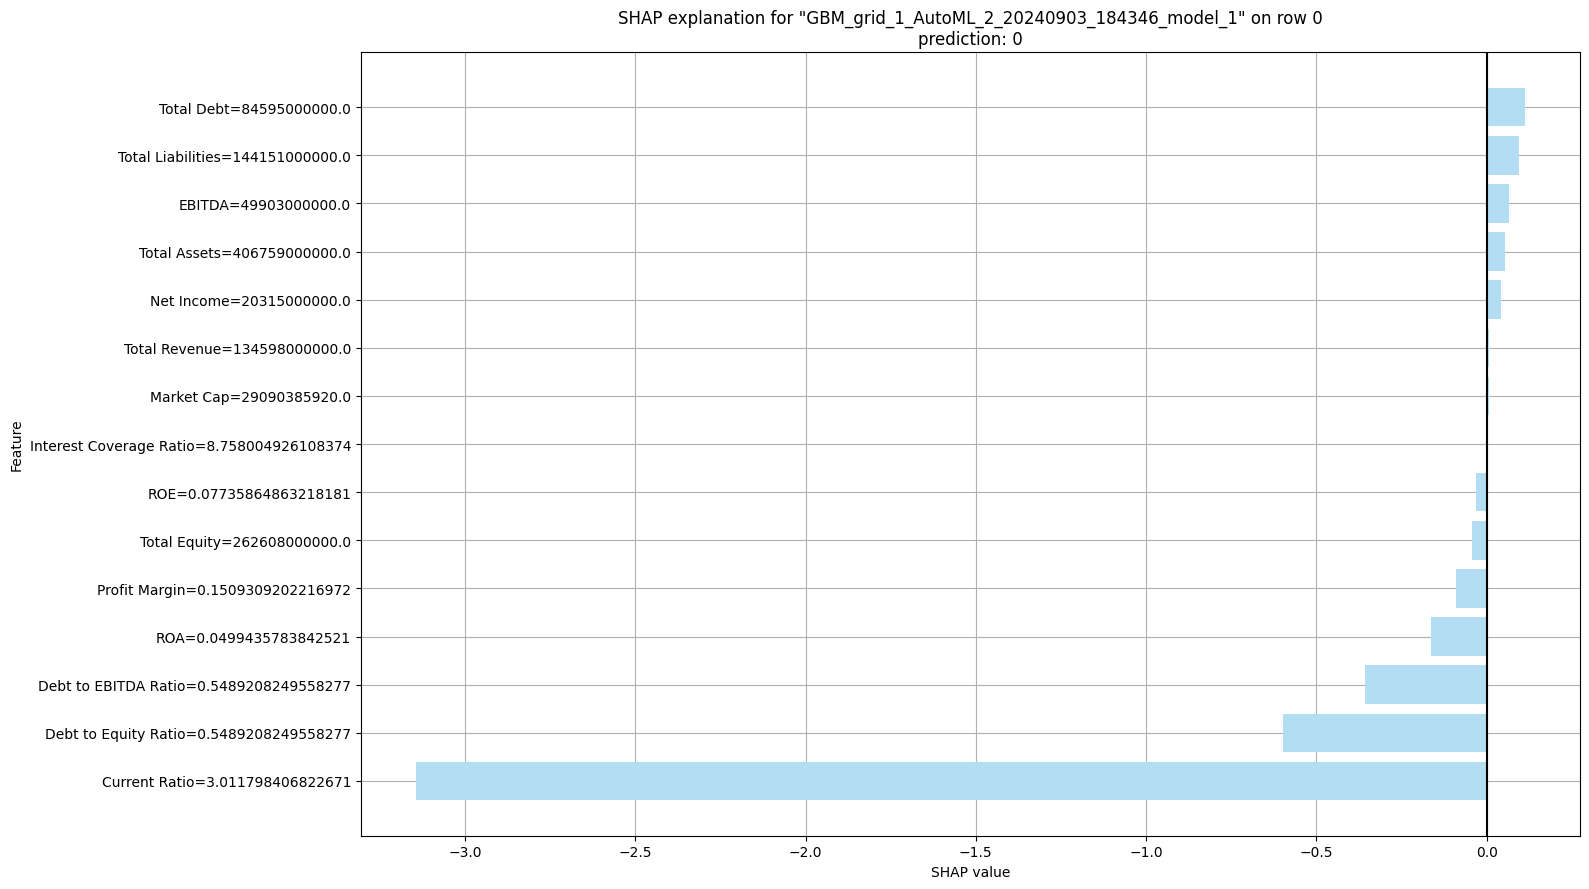

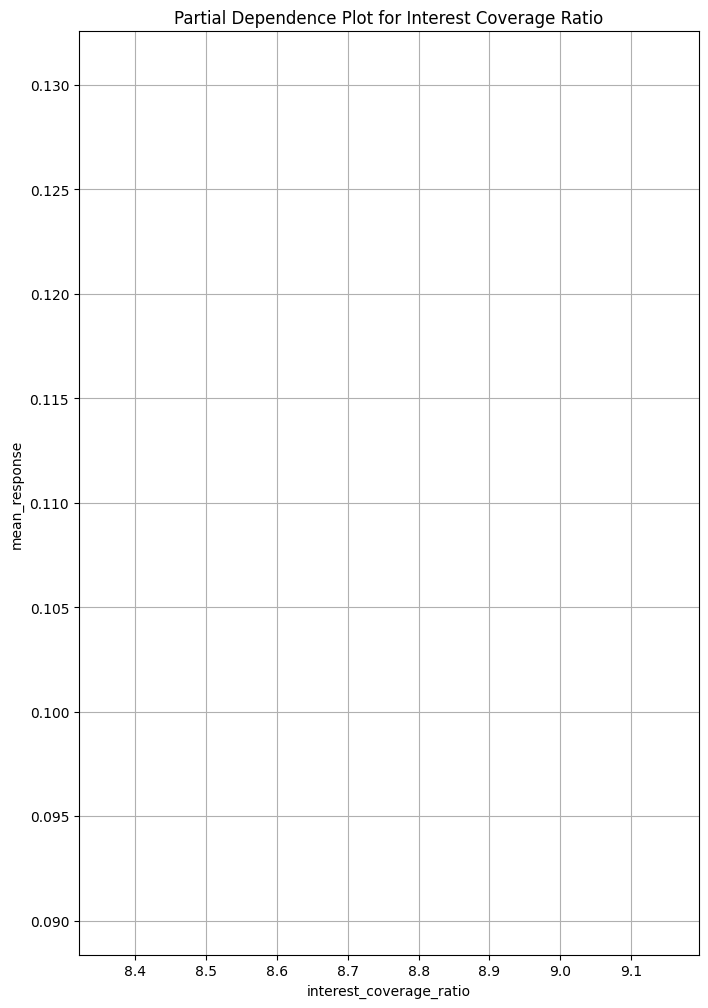

In [74]:
load_and_predict("/content/best_model/GBM_grid_1_AutoML_2_20240903_184346_model_1", new_data_df)


In [56]:
def MLmodel(new_data_df,df):

 from sklearn.model_selection import train_test_split
 from xgboost import XGBClassifier
 from sklearn.preprocessing import StandardScaler
 from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

 # Display the first few rows of the dataset to understand its structure
 #print("First few rows of the dataset:")
 #print(df.head())

 # Handle missing values by dropping rows with any missing values
 #df.replace('', np.nan, inplace=True)
 df.dropna(inplace=True)
 print(df)
 # Define the features (X) and the target (y) variable

 features = df.iloc[:,1:16]  #features
 target = df['Default']  # Target variable

 # Split the data into training and testing sets
 X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=42)

 # Initialize the StandardScaler
 sc = StandardScaler()

 # Fit the scaler on the numerical features and transform them
 X_train = sc.fit_transform(X_train)
 X_test = sc.transform(X_test)
 new_data_df_test = sc.transform(new_data_df)
 #print('testing data:' , X_test)
 # Initialize the Random Forest classifier
     # Initialize the XGBoost classifier
 xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

    # Train the model on the training data
 xgb_classifier.fit(X_train, y_train)

    # Make predictions on the test data
 y_pred = xgb_classifier.predict(X_test)

 # Evaluate the model's performance
 accuracy = accuracy_score(y_test, y_pred)
 conf_matrix = confusion_matrix(y_test, y_pred)
 class_report = classification_report(y_test, y_pred)

 print(f"Model Accuracy: {accuracy:.2f}")
 print("Confusion Matrix:")
 print(conf_matrix)
 print("Classification Report:")
 print(class_report)

 print('Predicted result: ', xgb_classifier.predict(new_data_df_test))


MLmodel(new_data_df, df)


    Ticker  Total Assets  Total Liabilities  Total Equity    Total Debt  \
0      MMM  5.058000e+10       4.571200e+10  4.868000e+09  1.685400e+10   
1      AOS  3.213900e+09       1.369500e+09  1.844400e+09  1.552000e+08   
2      ABT  7.321400e+10       3.438700e+10  3.882700e+10  1.562800e+10   
3     ABBV  1.347110e+11       1.243140e+11  1.039700e+10  5.938500e+10   
4      ACN  5.124530e+10       2.478671e+10  2.645859e+10  3.149034e+09   
..     ...           ...                ...           ...           ...   
498    XYL  1.611200e+10       5.936000e+09  1.017600e+10  2.390000e+09   
499    YUM  6.231000e+09       1.408900e+10 -7.858000e+09  1.203100e+10   
500   ZBRA  7.306000e+09       4.270000e+09  3.036000e+09  2.414000e+09   
501    ZBH  2.149690e+10       9.008800e+09  1.248810e+10  5.912600e+09   
502    ZTS  1.428600e+10       9.295000e+09  4.991000e+09  6.755000e+09   

     Total Revenue    Net Income        EBITDA  Debt to Equity Ratio  \
0     3.268100e+10 -6.99500

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:03:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [13]:
df.to_csv('firm_credit_risk_assessment.csv', index=False)